In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2 as cv
from tensorflow.keras.models import Sequential 
import math

In [2]:
path = Path("../data")
[x for x in path.iterdir()]

[PosixPath('../data/train'),
 PosixPath('../data/test'),
 PosixPath('../data/val')]

In [63]:
X_train_normal = [cv.imread(x.as_posix(), cv.IMREAD_GRAYSCALE) for x in Path(path / "train" / "normal").iterdir()]

In [64]:
X_train_normal = [img for img in X_train_normal if img is not None]

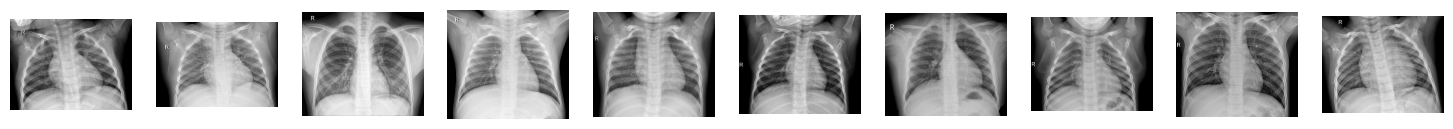

In [65]:
num_plots = 10
fig, axs = plt.subplots(1, num_plots)
for i in range(num_plots):
    img = X_train_normal[i]
    ax = axs[i]
    ax.imshow(img, cmap = "gray")
    ax.axis("off")
fig.set_size_inches(18.5, 10.5)
fig.show()

In [79]:
dimensions = pd.DataFrame([img.shape for img in X_train_normal], columns = ["height", "width"])
dimensions.head()

,height,width
0,1082,1438
1,1496,2148
2,1672,1955
3,1936,2156
4,1433,1666


In [82]:
max_width = dimensions.width.max()
max_height = dimensions.height.max()
print(f"The maximum dimensions in the training set are:")
print(f"Max height: {max_height}")
print(f"Max width: {max_width}")

The maximum dimensions in the training set are:
Max height: 2663
Max width: 2916


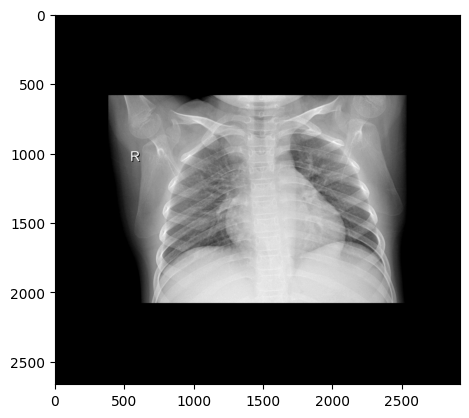

(2663, 2916)


In [81]:
unpadded_img = X_train_normal[1]
horizontal_padding = (max_width - unpadded_img.shape[1]) / 2
vertical_padding = (max_height - unpadded_img.shape[0]) / 2
padded_img = cv.copyMakeBorder(
    unpadded_img,
    top = math.ceil(vertical_padding),
    bottom = math.floor(vertical_padding),
    left = math.ceil(horizontal_padding),
    right = math.floor(horizontal_padding),
    borderType = cv.BORDER_CONSTANT,
    value = 0 
)
plt.imshow(padded_img, cmap = "gray")
plt.show()
print(padded_img.shape)